# Global Covid-19 Data Analysis

In [1]:
# Key Questions to ask when analysing this data set
# Questions to ask for Q1
# Population density vs Total infections? (linear regression) 
# GDP/Poverty vs death rate, # Poverty vs infection rate 
# Random sample of HDI vs total cases and death rate



In [2]:
# Importing the relevant dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import matplotlib
import datetime
import time

# To Display all the columns in the DataFrame
pd.options.display.max_columns=None

# Creating a timestamp to plot in the graphs
current_time = datetime.datetime.now()

In [3]:
# Opening the file and creating a DataFrame
raw_covid_19_data = pd.read_csv('..\Resources\owid-covid-data.csv')
raw_covid_19_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,18.733,18.733,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47111,NaN,NaN,International,2020-09-26,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47112,NaN,NaN,International,2020-09-27,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47113,NaN,NaN,International,2020-09-28,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47114,NaN,NaN,International,2020-09-29,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Substituting NaN data with a zero integer
raw_covid_19_data = raw_covid_19_data.fillna(0)
raw_covid_19_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.000,0.0,0.0,0.0,18.733,18.733,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
1,ABW,North America,Aruba,2020-03-19,0.0,0.0,0.286,0.0,0.0,0.0,0.000,0.000,2.676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
3,ABW,North America,Aruba,2020-03-21,0.0,0.0,0.286,0.0,0.0,0.0,0.000,0.000,2.676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
4,ABW,North America,Aruba,2020-03-22,0.0,0.0,0.286,0.0,0.0,0.0,0.000,0.000,2.676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47111,0,0,International,2020-09-26,696.0,0.0,0.000,7.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
47112,0,0,International,2020-09-27,696.0,0.0,0.000,7.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
47113,0,0,International,2020-09-28,696.0,0.0,0.000,7.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
47114,0,0,International,2020-09-29,696.0,0.0,0.000,7.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0


# Corrolation between population density and total cases

In [5]:
# Cleaning the Data Frame
# Viewing All the Columns in the DataFrame
raw_covid_19_data.columns


Index([&#39;iso_code&#39;, &#39;continent&#39;, &#39;location&#39;, &#39;date&#39;, &#39;total_cases&#39;, &#39;new_cases&#39;,
       &#39;new_cases_smoothed&#39;, &#39;total_deaths&#39;, &#39;new_deaths&#39;,
       &#39;new_deaths_smoothed&#39;, &#39;total_cases_per_million&#39;,
       &#39;new_cases_per_million&#39;, &#39;new_cases_smoothed_per_million&#39;,
       &#39;total_deaths_per_million&#39;, &#39;new_deaths_per_million&#39;,
       &#39;new_deaths_smoothed_per_million&#39;, &#39;new_tests&#39;, &#39;total_tests&#39;,
       &#39;total_tests_per_thousand&#39;, &#39;new_tests_per_thousand&#39;,
       &#39;new_tests_smoothed&#39;, &#39;new_tests_smoothed_per_thousand&#39;,
       &#39;tests_per_case&#39;, &#39;positive_rate&#39;, &#39;tests_units&#39;, &#39;stringency_index&#39;,
       &#39;population&#39;, &#39;population_density&#39;, &#39;median_age&#39;, &#39;aged_65_older&#39;,
       &#39;aged_70_older&#39;, &#39;gdp_per_capita&#39;, &#39;extreme_poverty&#39;,
      

In [6]:
# Selecting key columns for further analysis
pop_density_case = raw_covid_19_data.drop(columns = ['iso_code', 'continent','new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population','median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'])
pop_density_case

,location,date,total_cases,population_density
0,Aruba,2020-03-13,2.0,584.8
1,Aruba,2020-03-19,0.0,584.8
2,Aruba,2020-03-20,4.0,584.8
3,Aruba,2020-03-21,0.0,584.8
4,Aruba,2020-03-22,0.0,584.8
...,...,...,...,...
47111,International,2020-09-26,696.0,0.0
47112,International,2020-09-27,696.0,0.0
47113,International,2020-09-28,696.0,0.0
47114,International,2020-09-29,696.0,0.0


In [7]:
# List all the unique countries
pop_density_case['location'].unique()

array([&#39;Aruba&#39;, &#39;Afghanistan&#39;, &#39;Angola&#39;, &#39;Anguilla&#39;, &#39;Albania&#39;, &#39;Andorra&#39;,
       &#39;United Arab Emirates&#39;, &#39;Argentina&#39;, &#39;Armenia&#39;,
       &#39;Antigua and Barbuda&#39;, &#39;Australia&#39;, &#39;Austria&#39;, &#39;Azerbaijan&#39;,
       &#39;Burundi&#39;, &#39;Belgium&#39;, &#39;Benin&#39;, &#39;Bonaire Sint Eustatius and Saba&#39;,
       &#39;Burkina Faso&#39;, &#39;Bangladesh&#39;, &#39;Bulgaria&#39;, &#39;Bahrain&#39;, &#39;Bahamas&#39;,
       &#39;Bosnia and Herzegovina&#39;, &#39;Belarus&#39;, &#39;Belize&#39;, &#39;Bermuda&#39;,
       &#39;Bolivia&#39;, &#39;Brazil&#39;, &#39;Barbados&#39;, &#39;Brunei&#39;, &#39;Bhutan&#39;, &#39;Botswana&#39;,
       &#39;Central African Republic&#39;, &#39;Canada&#39;, &#39;Switzerland&#39;, &#39;Chile&#39;,
       &#39;China&#39;, &quot;Cote d&#39;Ivoire&quot;, &#39;Cameroon&#39;,
       &#39;Democratic Republic of Congo&#39;, &#39;Congo&#39;, &#39;Colombia&#39;, &#39;

In [8]:
# Removing world and international from the DataFrame
pop_density_case = pop_density_case[(pop_density_case['location']!='International')&(pop_density_case['location']!='World')]
pop_density_case

,location,date,total_cases,population_density
0,Aruba,2020-03-13,2.0,584.800
1,Aruba,2020-03-19,0.0,584.800
2,Aruba,2020-03-20,4.0,584.800
3,Aruba,2020-03-21,0.0,584.800
4,Aruba,2020-03-22,0.0,584.800
...,...,...,...,...
46561,Zimbabwe,2020-09-26,7787.0,42.729
46562,Zimbabwe,2020-09-27,7803.0,42.729
46563,Zimbabwe,2020-09-28,7812.0,42.729
46564,Zimbabwe,2020-09-29,7816.0,42.729


In [9]:
# Selecting Data for the last reported date
clean_pop_density_case = pop_density_case.drop_duplicates('location',keep='last').reset_index(drop=True)
clean_pop_density_case

,location,date,total_cases,population_density
0,Aruba,2020-09-30,3934.0,584.800
1,Afghanistan,2020-09-30,39254.0,54.422
2,Angola,2020-09-30,4905.0,23.890
3,Anguilla,2020-09-30,3.0,0.000
4,Albania,2020-09-30,13518.0,104.871
...,...,...,...,...
205,Kosovo,2020-09-30,15574.0,168.155
206,Yemen,2020-09-30,2035.0,53.508
207,South Africa,2020-09-30,672572.0,46.754
208,Zambia,2020-09-30,14715.0,22.995


In [10]:
# Sorting values based on total case numbers
clean_pop_density_case.sort_values('total_cases', ascending=False)

,location,date,total_cases,population_density
197,United States,2020-09-30,7191061.0,35.608
91,India,2020-09-30,6225763.0,450.419
27,Brazil,2020-09-30,4777522.0,25.040
162,Russia,2020-09-30,1167805.0,8.823
41,Colombia,2020-09-30,824042.0,44.223
...,...,...,...,...
65,Falkland Islands,2020-09-30,13.0,0.000
135,Montserrat,2020-09-30,13.0,0.000
199,Vatican,2020-09-30,12.0,0.000
3,Anguilla,2020-09-30,3.0,0.000


In [11]:
# Sorting values based on total case numbers
clean_pop_density_case.sort_values('population_density', ascending=False)

,location,date,total_cases,population_density
121,Monaco,2020-09-30,214.0,19347.500
167,Singapore,2020-09-30,57742.0,7915.731
84,Hong Kong,2020-09-15,0.0,7039.714
73,Gibraltar,2020-09-30,391.0,3457.100
20,Bahrain,2020-09-30,70422.0,1935.907
...,...,...,...,...
65,Falkland Islands,2020-09-30,13.0,0.000
59,Western Sahara,2020-09-30,766.0,0.000
173,South Sudan,2020-09-30,2700.0,0.000
135,Montserrat,2020-09-30,13.0,0.000


In [12]:
# Dropping rows where there are no reported cases
clean_pop_density_case = clean_pop_density_case[clean_pop_density_case['total_cases']>0]
clean_pop_density_case

,location,date,total_cases,population_density
0,Aruba,2020-09-30,3934.0,584.800
1,Afghanistan,2020-09-30,39254.0,54.422
2,Angola,2020-09-30,4905.0,23.890
3,Anguilla,2020-09-30,3.0,0.000
4,Albania,2020-09-30,13518.0,104.871
...,...,...,...,...
205,Kosovo,2020-09-30,15574.0,168.155
206,Yemen,2020-09-30,2035.0,53.508
207,South Africa,2020-09-30,672572.0,46.754
208,Zambia,2020-09-30,14715.0,22.995


# Plotting Data on Population Density against Total Cases

The r-squared value is: 0.0004140135369081985
The linear regression equation is y = -10.3x + 164511.59


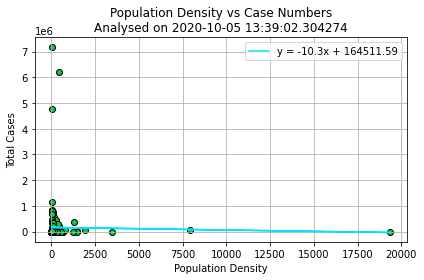

In [13]:
# Scatter Plot
x_pop_density = clean_pop_density_case['population_density']
y_total_cases = clean_pop_density_case['total_cases']

# Linear Regression Equation
pop_slope, pop_int, pop_r, pop_p, pop_stderr = st.linregress(x_pop_density, y_total_cases)

pop_line_eq = f'y = {str(round(pop_slope,2))}x + {str(round(pop_int,2))}'

pop_line_of_best_fit = x_pop_density * pop_slope + pop_int


fig1, ax1 = plt.subplots()
ax1.set_title(f'Population Density vs Case Numbers\nAnalysed on {current_time}')
ax1.set_ylabel(f'Total Cases')
ax1.set_xlabel(f'Population Density')
ax1.scatter(x_pop_density,y_total_cases, edgecolors='#000000', c='#0ac940')
ax1.plot(x_pop_density, pop_line_of_best_fit, c='#00e5ff')
ax1.grid(True)
fig1.tight_layout()
ax1.legend([pop_line_eq])
print(f'The r-squared value is: {pop_r**2}\nThe linear regression equation is {pop_line_eq}')
plt.savefig('..\Images\population_den_total_cases.png')
plt.show()


In [14]:
# Determining Outliers for Population Density
pop_quartile = clean_pop_density_case['population_density'].quantile([0.25,0.5,0.75])

# First Quartile
Q1_p = pop_quartile[0.25] # Population

# Third Quartile
Q3_p = pop_quartile[0.75] # Population

# Interquartile Ranges
IQR_p = Q3_p - Q1_p # Population

# Upper and Lower Bound Vales
lower_bound_p = Q1_p-(IQR_p*1.5) # Population
upper_bound_p = Q3_p+(IQR_p*1.5) # Population


# Outliers
# Population
outliers_p = x_pop_density.loc[(x_pop_density<lower_bound_p)|(x_pop_density>upper_bound_p)]

print(f'The Outliers for Population Density are\n {[p for p in outliers_p]}')


The Outliers for Population Density are
 [584.8, 1265.036, 1935.9070000000002, 1308.82, 664.4630000000001, 3457.1, 527.967, 594.561, 19347.5, 1454.433, 1454.037, 622.962, 508.54400000000004, 778.202, 494.869, 7915.731, 556.6669999999999, 1209.088]


In [15]:
# List of Countries that are Outliers based on Population Density
country_outliers_p = pd.DataFrame(clean_pop_density_case.loc[(clean_pop_density_case['population_density']<lower_bound_p)|(clean_pop_density_case['population_density']>upper_bound_p)])
country_outliers_p

,location,date,total_cases,population_density
0,Aruba,2020-09-30,3934.0,584.800
18,Bangladesh,2020-09-30,362043.0,1265.036
20,Bahrain,2020-09-30,70422.0,1935.907
25,Bermuda,2020-09-30,181.0,1308.820
28,Barbados,2020-09-30,190.0,664.463
73,Gibraltar,2020-09-30,391.0,3457.100
107,South Korea,2020-09-30,23812.0,527.967
110,Lebanon,2020-09-30,38377.0,594.561
121,Monaco,2020-09-30,214.0,19347.500
124,Maldives,2020-09-30,10194.0,1454.433


In [16]:
# Outliers for Total Cases
quartile_t = clean_pop_density_case['total_cases'].quantile([0.25,0.5,0.75])

# First Quartile
Q1_t = quartile_t[0.25]

# Third Quartile
Q3_t = quartile_t[0.75]

# Interquartile Range
IQR_t = Q3_t-Q1_t

# Upper and Lower Bound Values
lower_bound_t = Q1_t - (IQR_t * 1.5)
upper_bound_t = Q3_t + (IQR_t * 1.5)

# Outlier values
outliers_t = y_total_cases.loc[(y_total_cases<lower_bound_t)|(y_total_cases>upper_bound_t)]


In [17]:
# List of Outlier Countries based on Total Cases
country_outliers_t = pd.DataFrame(clean_pop_density_case.loc[(clean_pop_density_case['total_cases']<lower_bound_t)|(clean_pop_density_case['total_cases']>upper_bound_t)])
country_outliers_t

,location,date,total_cases,population_density
7,Argentina,2020-09-30,736596.0,16.177
18,Bangladesh,2020-09-30,362043.0,1265.036
27,Brazil,2020-09-30,4777522.0,25.040
35,Chile,2020-09-30,461300.0,24.282
41,Colombia,2020-09-30,824042.0,44.223
50,Germany,2020-09-30,289219.0,237.016
60,Spain,2020-09-29,758172.0,93.105
66,France,2020-09-30,550690.0,122.578
69,United Kingdom,2020-09-30,446156.0,272.898
89,Indonesia,2020-09-30,282724.0,145.725


In [18]:
# Removing Outlier Countries
no_outlier_df = clean_pop_density_case[
    (clean_pop_density_case['total_cases']>lower_bound_t) &             
    (clean_pop_density_case['total_cases']<upper_bound_t) &
    (clean_pop_density_case['population_density']>lower_bound_p)&
    (clean_pop_density_case['population_density']<upper_bound_p)
    ]

no_outlier_df

,location,date,total_cases,population_density
1,Afghanistan,2020-09-30,39254.0,54.422
2,Angola,2020-09-30,4905.0,23.890
3,Anguilla,2020-09-30,3.0,0.000
4,Albania,2020-09-30,13518.0,104.871
5,Andorra,2020-09-30,1966.0,163.755
...,...,...,...,...
204,Vietnam,2020-09-30,1094.0,308.127
205,Kosovo,2020-09-30,15574.0,168.155
206,Yemen,2020-09-30,2035.0,53.508
208,Zambia,2020-09-30,14715.0,22.995


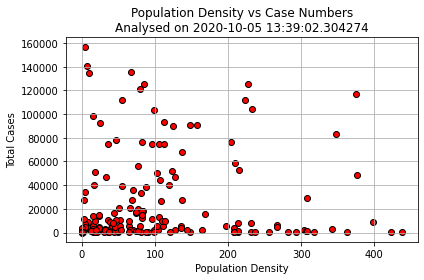

In [19]:
# Scatter Plot after removing Outliers
x_pop_density_no_outlier = no_outlier_df['population_density']
y_total_cases_no_outlier = no_outlier_df['total_cases']

fig1, ax1 = plt.subplots()
ax1.set_title(f'Population Density vs Case Numbers\nAnalysed on {current_time}')
ax1.set_ylabel(f'Total Cases')
ax1.set_xlabel(f'Population Density')
ax1.scatter(x_pop_density_no_outlier,y_total_cases_no_outlier, edgecolors='#000000', c='#ff0000')
ax1.grid(True)
fig1.tight_layout()
plt.savefig('..\Images\population_den_total_cases_noOutlier.png')
plt.show()

The r-aquared value is: 0.0028131589555276133
The linear regression equation is y = 19.27x + 23148.49


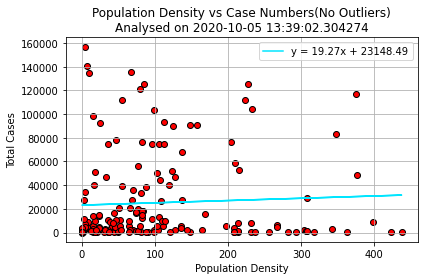

In [20]:
# Plotting a Linear Regression
slope, intersection, r, p, stderr = st.linregress(x_pop_density_no_outlier,y_total_cases_no_outlier)

# Linear Regression Equation
line_eq = f'y = {str(round(slope,2))}x + {str(round(intersection,2))}'

# Line of Best Fit
line_of_best_fit = x_pop_density_no_outlier * slope + intersection

x_pop_density_no_outlier = no_outlier_df['population_density']
y_total_cases_no_outlier = no_outlier_df['total_cases']

fig1, ax1 = plt.subplots()
ax1.plot(x_pop_density_no_outlier,line_of_best_fit,c='#00e5ff')
ax1.set_title(f'Population Density vs Case Numbers(No Outliers)\nAnalysed on {current_time}')
ax1.set_ylabel(f'Total Cases')
ax1.set_xlabel(f'Population Density')
ax1.scatter(x_pop_density_no_outlier,y_total_cases_no_outlier, edgecolors='#000000', c='#ff0000')
ax1.grid(True)
ax1.legend([line_eq])
fig1.tight_layout()
plt.savefig('..\Images\population_den_total_cases_noOutlier.png')
print(f'The r-aquared value is: {r**2}\nThe linear regression equation is {line_eq}')
plt.show()

## Summary
#### The objective of the first part of the analyses was to determine if there was indeed a correlation between population density and the total number of cases. Based on the first scatter plot analyses and a generation of the linear regression analysis, the correlation appeared to be very weak with a r-squared value of 0.0004. Therefore, a further analyses was undertaken wherein the outlier countries based on either total cases or population density, were removed and reanalysed. Based on the latter data, the correlation appears to also be significantly low, with a r-squared value of 0.002. This indicates that factors apart from population density maybe contributing to higher case numbers in countries where population densities are low, for example, the United States.  

# GDP/Poverty vs death rate, Poverty vs infection rate

#### GDP and Poverty Rate vs Death Rate

In [21]:
# Perusing the raw data set once more
raw_covid_19_data.columns

Index([&#39;iso_code&#39;, &#39;continent&#39;, &#39;location&#39;, &#39;date&#39;, &#39;total_cases&#39;, &#39;new_cases&#39;,
       &#39;new_cases_smoothed&#39;, &#39;total_deaths&#39;, &#39;new_deaths&#39;,
       &#39;new_deaths_smoothed&#39;, &#39;total_cases_per_million&#39;,
       &#39;new_cases_per_million&#39;, &#39;new_cases_smoothed_per_million&#39;,
       &#39;total_deaths_per_million&#39;, &#39;new_deaths_per_million&#39;,
       &#39;new_deaths_smoothed_per_million&#39;, &#39;new_tests&#39;, &#39;total_tests&#39;,
       &#39;total_tests_per_thousand&#39;, &#39;new_tests_per_thousand&#39;,
       &#39;new_tests_smoothed&#39;, &#39;new_tests_smoothed_per_thousand&#39;,
       &#39;tests_per_case&#39;, &#39;positive_rate&#39;, &#39;tests_units&#39;, &#39;stringency_index&#39;,
       &#39;population&#39;, &#39;population_density&#39;, &#39;median_age&#39;, &#39;aged_65_older&#39;,
       &#39;aged_70_older&#39;, &#39;gdp_per_capita&#39;, &#39;extreme_poverty&#39;,
      

In [22]:
# Calculating infection rate for each country

country_list = list((raw_covid_19_data['location']).drop_duplicates())
country_list

list_of_countries = []

rate_of_infection = []

# Using a for loop to calculate the rate of infection
for country in country_list:
    
    # Adds the total number of cases till the 30th of September
    new_case = raw_covid_19_data[raw_covid_19_data['location']==country]['new_cases'].sum()

    # This will take the first value and use it in subsequent calculations
    population = raw_covid_19_data[raw_covid_19_data['location']==country]['population'].head(1)
    
    # Calulating rate of infection as a percentage
    infection_rates = float((new_case/population * 100))

    rate_of_infection.append(infection_rates)

    list_of_countries.append(country)


    print(f'Appending data for {country}\n')
    print(f'Population: {float(population)}\nInection Rate: {float(round(infection_rates,2))}\n')
    



Appending data for Aruba

Population: 106766.0
Inection Rate: 3.68

Appending data for Afghanistan

Population: 38928341.0
Inection Rate: 0.1

Appending data for Angola

Population: 32866268.0
Inection Rate: 0.01

Appending data for Anguilla

Population: 15002.0
Inection Rate: 0.02

Appending data for Albania

Population: 2877800.0
Inection Rate: 0.47

Appending data for Andorra

Population: 77265.0
Inection Rate: 2.54

Appending data for United Arab Emirates

Population: 9890400.0
Inection Rate: 0.94

Appending data for Argentina

Population: 45195777.0
Inection Rate: 1.63

Appending data for Armenia

Population: 2963234.0
Inection Rate: 1.68

Appending data for Antigua and Barbuda

Population: 97928.0
Inection Rate: 0.1

Appending data for Australia

Population: 25499881.0
Inection Rate: 0.11

Appending data for Austria

Population: 9006400.0
Inection Rate: 0.5

Appending data for Azerbaijan

Population: 10139175.0
Inection Rate: 0.4

Appending data for Burundi

Population: 11890781.

In [23]:
# Creating a new DataFrame by combining both lists
country_infection_rate = pd.DataFrame({
    'Country':list_of_countries,
    'Infection Rate': rate_of_infection
})

country_infection_rate = country_infection_rate[
    (country_infection_rate['Country']!='World')&
    (country_infection_rate['Country']!='International')
    ]

country_infection_rate


,Country,Infection Rate
0,Aruba,3.684694
1,Afghanistan,0.100837
2,Angola,0.014924
3,Anguilla,0.019997
4,Albania,0.469734
...,...,...
205,Kosovo,0.805785
206,Yemen,0.006823
207,South Africa,1.134019
208,Zambia,0.080043


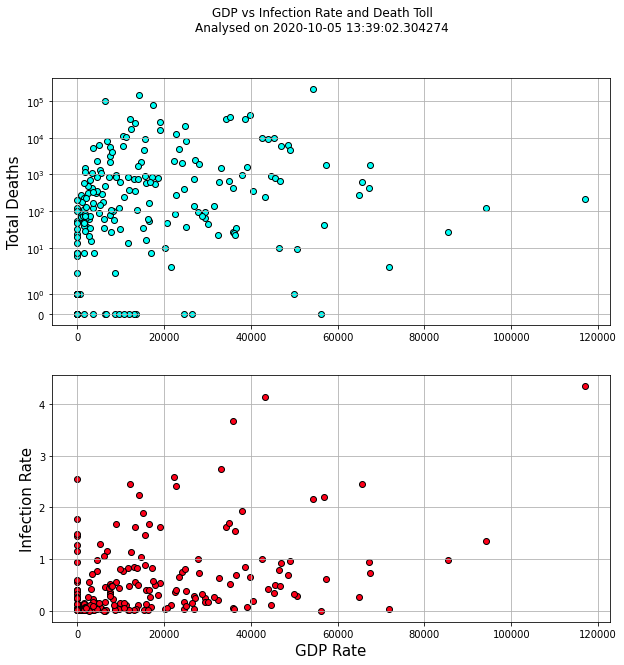

In [55]:
# Selecting relevant columns for data Analysis
gdp_death_rate = raw_covid_19_data[['location','gdp_per_capita','total_deaths']]



# Dropping International and World From the DataFrame
gdp_death_rate = gdp_death_rate[
    (gdp_death_rate['location']!='World')&
    (gdp_death_rate['location']!='International')]

# Dropping Duplicate Rows
gdp_death_rate = gdp_death_rate.drop_duplicates('location',keep='last').reset_index(drop=True)

# Plotting Two Subplots
x_gdp = gdp_death_rate['gdp_per_capita']
y_td = gdp_death_rate['total_deaths']
y_inf_rate = country_infection_rate['Infection Rate']

fig2, ax2 = plt.subplots(2)
fig2.suptitle(f'GDP vs Infection Rate and Death Toll\nAnalysed on {current_time}')
plt.xlabel('GDP Rate', fontsize=15)
fig2.set_size_inches(10,10)
ax2[0].scatter(x_gdp, y_td, edgecolor='black', c='#00fff7')
ax2[0].set_ylabel('Total Deaths',fontsize=15)
ax2[0].set_yscale("symlog")
ax2[1].scatter(x_gdp, y_inf_rate, edgecolor='black', c='#ff0019')
ax2[1].set_ylabel('Infection Rate',fontsize=15)

fig1.tight_layout()
ax2[0].grid(True)
ax2[1].grid(True)
plt.show()

0      35973.781
1       1803.987
2       5819.495
3          0.000
4      11803.431
         ...    
205     9795.834
206     1479.147
207    12294.876
208     3689.251
209     1899.775
Name: gdp_per_capita, Length: 210, dtype: float64